# NMF
## Imports

In [1]:
from time import time
import psycopg2
from collections import Counter
import gc
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import classification_report
np.set_printoptions(suppress=True,precision=10)

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("/home/scidb/HeartRatePatterns/Python"))
from LogisticRegresion import ajustLogisticRegression
from Matrix import convert_matrix
from NMF import find_best_NMF,find_pearson

In [3]:
t0=time()
table = convert_matrix(sumvals=False)
#sortColumns =['abbac','adadd']
#table = table.sort_values(sortColumns, ascending=False)
print("converMatrix done in %0.3fs." % (time() - t0))
table

(590, 58840)
converMatrix done in 60.389s.


,,aaaaaaa,aaaaaaaa,aaaaaaab,aaaaaaac,aaaaaaad,aaaaaaae,aaaaaaaf,aaaaaaag,aaaaaaah,aaaaaaai,...,kkb,kke,lab,lbb,lbbb,lbbc,lcc,leb,lib,libb
subject_id,isAlive,,,,,,,,,,,,,,,,,,,,,
20,0,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,1,1,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
151,1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177,1,1,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
214,1,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
263,1,1,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
279,1,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368,1,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split
survived = table.index.labels[1].tolist()
patients = table.values
patients_train, patients_test,survived_train, survived_test = train_test_split(patients,survived,test_size=0.2, random_state=42)

In [5]:
print(table.shape)
print(patients_train.shape)
print(patients_test.shape)

(590, 58840)
(472, 58840)
(118, 58840)


### NMF + Logistic Regression accurancy

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,

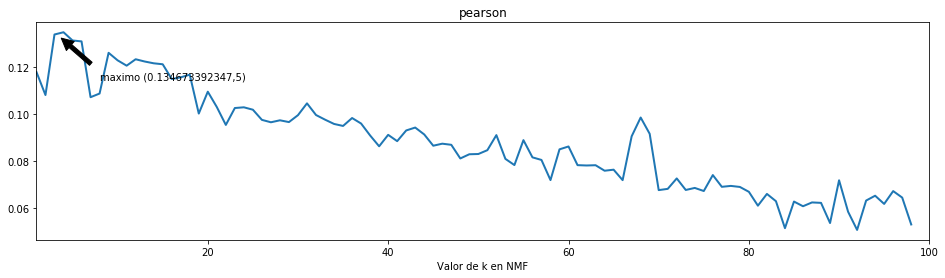

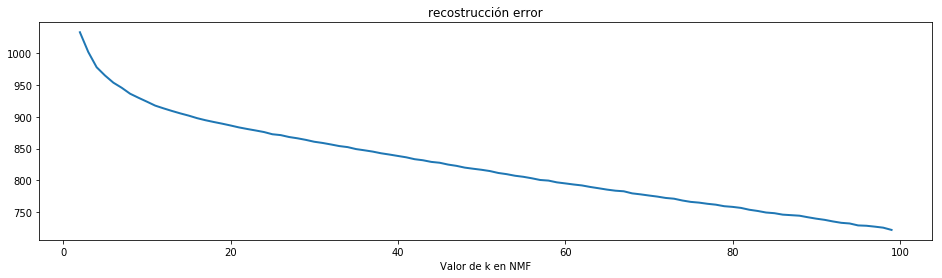

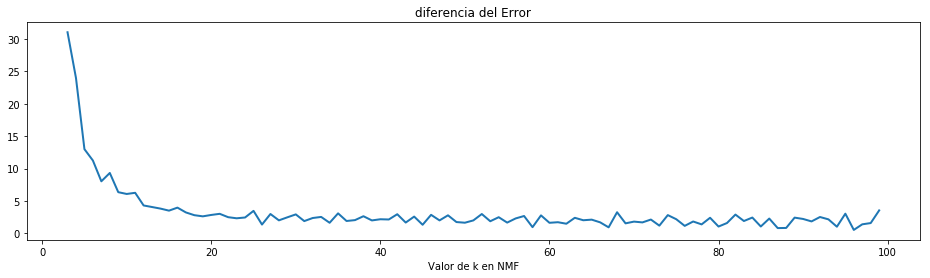

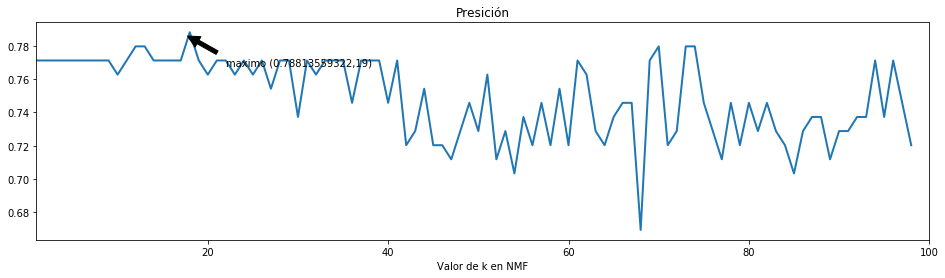

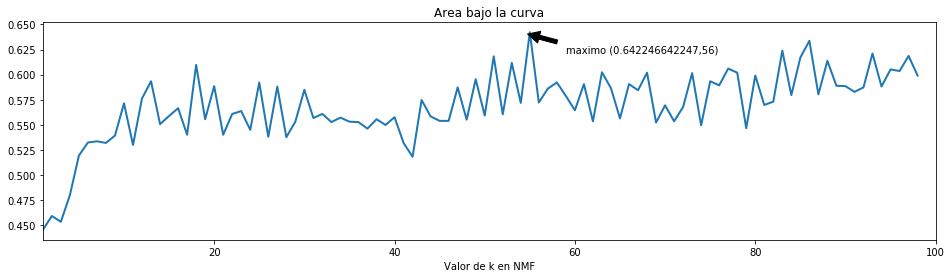

In [6]:
find_best_NMF(patients,survived)